# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Muhammad Septiyanto]
- **Email:** [msyant990@gmail.com]
- **ID Dicoding:** [0013_mseptiyan]

## 1. Menentukan Pertanyaan Bisnis
- Pertanyaan 1 : Bagaimana pola pembelian berdasarkan kategori produk?
- Pertanyaan 2 : Apa tren pembayaran yang paling sering digunakan oleh pelanggan?
- Pertanyaan 3 : Bagaimana perilaku pelanggan berdasarkan RFM Analysis untuk membantu strategi pemasaran?

## 2. Import Packages/Library

In [58]:
import requests
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from datetime import datetime
import time

## 3. Data Wrangling

### Gathering Data

Mengimpor dataset yang digunakan:

In [59]:
dataset_path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")  


customers = pd.read_csv(os.path.join(dataset_path, "olist_customers_dataset.csv"))
geolocation = pd.read_csv(os.path.join(dataset_path, "olist_geolocation_dataset.csv"))
order_items = pd.read_csv(os.path.join(dataset_path, "olist_order_items_dataset.csv"))
order_payments = pd.read_csv(os.path.join(dataset_path, "olist_order_payments_dataset.csv"))
order_reviews = pd.read_csv(os.path.join(dataset_path, "olist_order_reviews_dataset.csv"))
orders = pd.read_csv(os.path.join(dataset_path, "olist_orders_dataset.csv"))
products = pd.read_csv(os.path.join(dataset_path, "olist_products_dataset.csv"))
category_translation = pd.read_csv(os.path.join(dataset_path, "product_category_name_translation.csv"))
sellers = pd.read_csv(os.path.join(dataset_path, "olist_sellers_dataset.csv"))

**Insight:**
- Data berhasil dikumpulkan dari berbagai file CSV yang berhubungan dengan pelanggan, produk, kategori produk, penjual, pembayaran, ulasan, dan lainnya.
- Terdapat beberapa file yang membutuhkan penggabungan data untuk analisis yang lebih menyeluruh, seperti tabel kategori produk yang perlu diterjemahkan.

### Assessing Data

Mengecek informasi dataset dan missing values:


In [60]:
print(customers.info())
print(orders.info())
print(products.info())

missing_values = orders.isnull().sum()
print(missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  obje

**Insight:**

- Beberapa data memiliki missing values dan perlu dibersihkan.

- Terdapat beberapa tipe data yang perlu disesuaikan.


## 4. Exploratory Data Analysis (EDA)

## Pertanyaan 1 : 
**Pola Pembelian Berdasarkan Kategori Produk :**


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28296\3732847336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index[:10], y=category_counts.values[:10], palette="viridis")


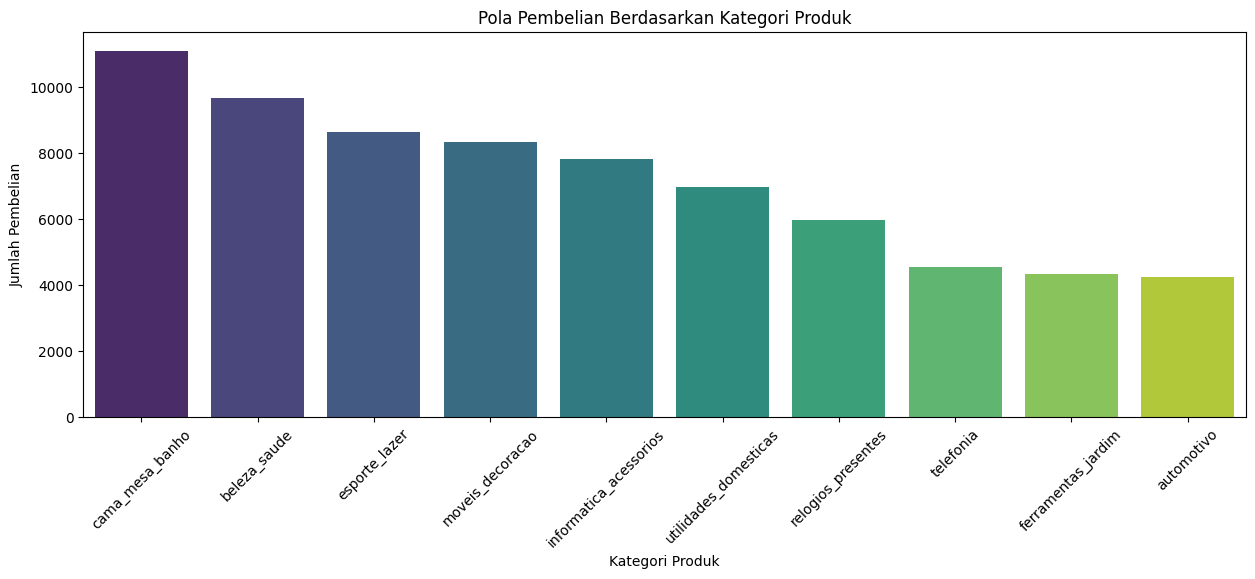

In [61]:
merged_data = orders.merge(order_items, on='order_id', how='left')
merged_data = merged_data.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')

category_counts = merged_data['product_category_name'].value_counts()

plt.figure(figsize=(15, 5))
sns.barplot(x=category_counts.index[:10], y=category_counts.values[:10], palette="viridis")
plt.xticks(rotation=45)
plt.title("Pola Pembelian Berdasarkan Kategori Produk")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pembelian")
plt.show()

**Insight:**

- Kategori produk dengan penjualan tertinggi adalah Cama Mesa Banho.

- Perusahaan dapat meningkatkan stok produk kategori ini dan melakukan strategi pemasaran yang lebih spesifik.


## Pertanyaan 2 :
**Tren Pembayaran yang Paling Sering Digunakan :**


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28296\3364176559.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_trends.index, y=payment_trends.values, palette="coolwarm")


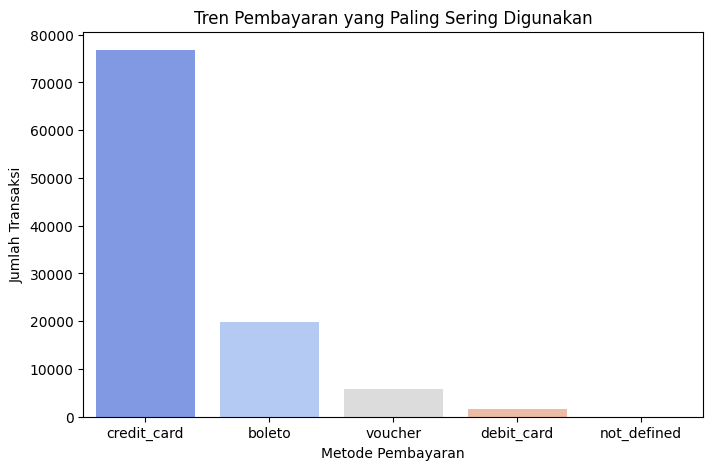

In [62]:
payment_trends = order_payments['payment_type'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=payment_trends.index, y=payment_trends.values, palette="coolwarm")
plt.title("Tren Pembayaran yang Paling Sering Digunakan")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.show()


**Insight:**

- Credit Card adalah metode pembayaran yang paling sering digunakan.

- Perusahaan dapat memberikan promo khusus untuk pembayaran dengan kartu kredit agar meningkatkan penjualan.


## 5. Analisis RFM (Recency, Frequency, Monetary)

Mengkonversi kolom tanggal menjadi datetime

In [63]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

Menggabungkan data pelanggan dan transaksi

In [64]:
rfm_data = orders.merge(order_items, on="order_id", how="left")
rfm_data = rfm_data.merge(customers, on="customer_id", how="left")


Menentukan hari terakhir transaksi

In [65]:
latest_date = orders['order_purchase_timestamp'].max()


Menghitung RFM

In [66]:
rfm_table = rfm_data.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (latest_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'price': 'sum'  # Monetary
})


Ubah nama kolom agar lebih jelas

In [67]:
rfm_table.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'price': 'Monetary'
}, inplace=True)

Menampilkan Hasil

In [68]:
print(rfm_table.head())

                                  Recency  Frequency  Monetary
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2      160          1    129.90
0000b849f77a49e4a4ce2b2a4ca5be3f      163          1     18.90
0000f46a3911fa3c0805444483337064      585          1     69.00
0000f6ccb0745a6a4b88665a16c9f078      369          1     25.99
0004aac84e0df4da2b147fca70cf8255      336          1    180.00


### Visualisasi Distribusi RFM

## Pertanyaan 3 :
**perilaku pelanggan berdasarkan RFM Analysis untuk membantu strategi pemasaran :**


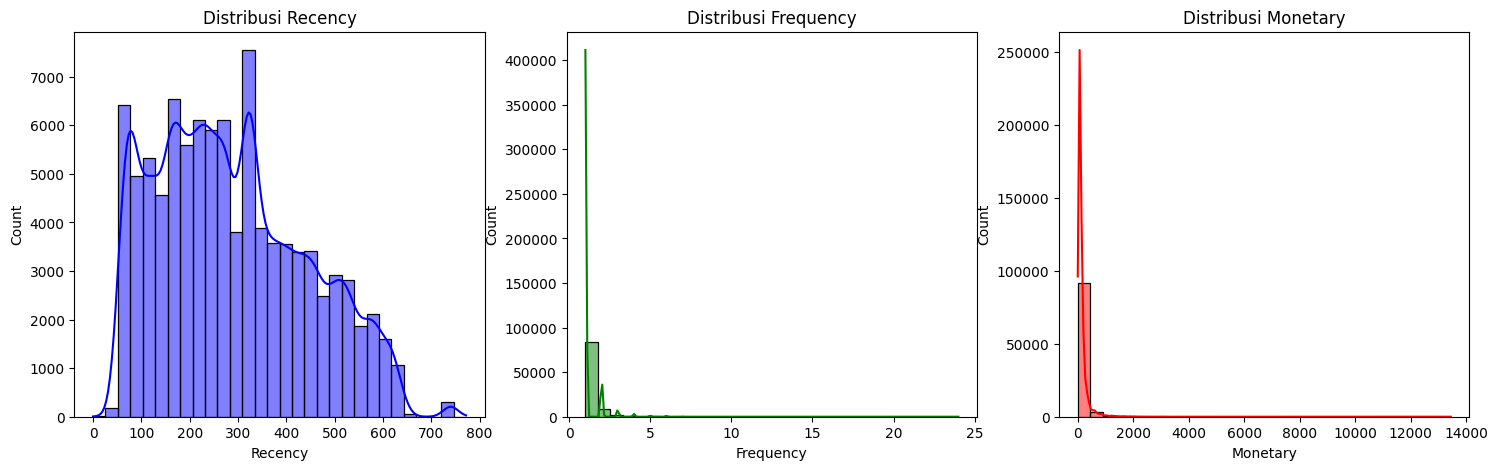

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm_table['Recency'], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribusi Recency")

sns.histplot(rfm_table['Frequency'], bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Distribusi Frequency")

sns.histplot(rfm_table['Monetary'], bins=30, kde=True, ax=axes[2], color="red")
axes[2].set_title("Distribusi Monetary")

plt.show()


**Insight:**

- Recency: Sebagian besar pelanggan terakhir bertransaksi dalam rentang 100-400 hari, dengan beberapa puncak di sekitar 100, 200, dan 300 hari. Namun, ada juga yang tidak bertransaksi hingga 700 hari. Perusahaan dapat memberikan diskon reaktivasi atau penawaran eksklusif untuk menarik kembali pelanggan lama.

- Frequency: Mayoritas pelanggan hanya bertransaksi sekali atau dua kali, sementara pelanggan dengan transaksi lebih dari 5 kali sangat sedikit. Perusahaan bisa meningkatkan program loyalitas atau memberikan insentif untuk pembelian berulang guna meningkatkan retensi pelanggan.

- Monetary: Sebagian besar pelanggan memiliki total belanja di bawah 2000, sementara hanya sedikit yang memiliki nilai transaksi sangat tinggi. Ini menunjukkan peluang untuk menerapkan strategi bundling, upselling, atau diskon volume agar pelanggan membelanjakan lebih banyak dalam satu transaksi.


### Simpan ke dalam file CSV

In [ ]:
orders.to_csv("olist_orders_dataset.csv", index=False)
order_payments.to_csv("olist_order_payments_dataset.csv", index=False)  # Sesuai dengan yang ada di IPYNB
order_items.to_csv("olist_order_items_dataset.csv", index=False)
products.to_csv("olist_products_dataset.csv", index=False)
rfm_table.to_csv("rfm_analysis_results.csv", index=False)  # Hasil RFM

print("Semua dataset telah disimpan ke CSV.")

Semua dataset telah disimpan ke CSV.


## Conclusion

1. Kategori produk terlaris adalah Cama Mesa Banho, menunjukkan bahwa produk dalam kategori ini memiliki permintaan tinggi. Perusahaan bisa mempertimbangkan penambahan stok, diskon khusus, atau strategi bundling untuk meningkatkan penjualan lebih lanjut.


2. Metode pembayaran paling populer adalah Credit Card, yang menunjukkan preferensi pelanggan terhadap transaksi non-tunai. Promo seperti cicilan 0% atau cashback dapat digunakan untuk mendorong lebih banyak transaksi.


3. Analisis RFM memberikan wawasan tentang perilaku pelanggan:

- Recency: Sebagian besar pelanggan terakhir bertransaksi dalam rentang 100-400 hari, tetapi ada juga yang sudah lama tidak belanja hingga 700 hari. Strategi retargeting melalui email atau diskon khusus bisa menarik kembali pelanggan lama.

- Frequency: Mayoritas pelanggan hanya belanja sekali atau dua kali, dengan sedikit yang melakukan pembelian lebih dari 5 kali. Program loyalitas dan penawaran eksklusif untuk pelanggan setia bisa membantu meningkatkan frekuensi pembelian.

- Monetary: Sebagian besar pelanggan memiliki total belanja di bawah 2000, sementara hanya sedikit yang memiliki nilai transaksi sangat tinggi. Strategi upselling, bundling produk, atau insentif pembelian dalam jumlah besar dapat diterapkan untuk meningkatkan nilai transaksi.


Hasil analisis ini sudah disimpan ke rfm_analysis_results.csv dan bisa dikembangkan lebih jauh